In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
!cp -r "/content/gdrive/My Drive/Colab Notebooks/cloudy-cycle-gans/" ./

In [3]:
%cd 'cloudy-cycle-gans'

/content/cloudy-cycle-gans


In [0]:
!unzip -qq -d data_small/ data_small/compress.zip

In [0]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [0]:
from runner.trainer import Trainer

In [0]:
import torch

In [8]:
!nvidia-smi
torch.cuda.empty_cache()

Wed Nov 27 16:56:42 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.33.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [9]:
is_cuda = True and torch.cuda.is_available()
print(is_cuda)

True


In [0]:
trainer = Trainer('data_small', 
                  '/content/gdrive/My Drive/Colab Notebooks/cloudy-cycle-gans/model_checkpoints2', 
                  batch_size=1, load_from_disk=True, cuda=is_cuda)

In [0]:
trainer.train(50)

Epoch #0 Batch#0
Time elapsed: Global = 0.23556232452392578s Last log = 0.23556232452392578s
Losses: T=12.5414232686162 G=1.6385717391967773, D=0.10922760516405106, C=10.793623924255371
Epoch #0 Batch#100
Time elapsed: Global = 46.072285652160645s Last log = 45.83672332763672s
Losses: T=9.679426788317505 G=1.5543345767259598, D=0.13795231424504892, C=7.987139897346497
Epoch #0 Batch#200
Time elapsed: Global = 91.32384419441223s Last log = 45.25155854225159s
Losses: T=8.85273446871026 G=1.5563880395889282, D=0.13496511055214797, C=7.161381318569183
Epoch #0 Batch#300
Time elapsed: Global = 136.6628680229187s Last log = 45.33902382850647s
Losses: T=8.412672111596912 G=1.5610657405853272, D=0.12153830965980887, C=6.730068061351776
Epoch #0 Batch#400
Time elapsed: Global = 182.03451991081238s Last log = 45.37165188789368s
Losses: T=8.321032737889327 G=1.6116053402423858, D=0.10786665717605501, C=6.6015607404708865
Epoch #0 Batch#500
Time elapsed: Global = 227.35706186294556s Last log = 45.

In [0]:
trainer.test_on_random_images(out_dir='/content/gdrive/My Drive/Colab Notebooks/cloudy-cycle-gans/sample_images/')

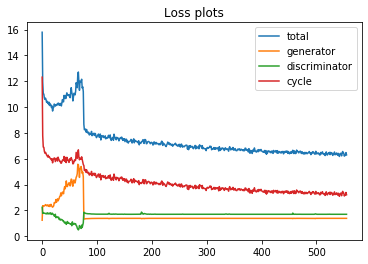

In [0]:
trainer.train_history.plot_train_loss()